# **Aprendizaje máquina sin el uso de frameworks**

Francisco Mestizo Hernández A01731549

## **Instrucciones**

Entregable: Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.

* Crea un repositorio de GitHub para este proyecto.
* Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) haciendo uso de una biblioteca o framework de aprendizaje máquina. Lo que se busca es que demuestres tu conocimiento sobre el framework y como configurar el algoritmo.
* Prueba tu implementación con un set de datos y realiza algunas predicciones. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos.
* Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.

## **Introducción**


En términos generales, debemos seguir los siguientes pasos:
1. Importar módulos
2. Cargar datos
3. Separar datos en subconjuntos
4. Entrenar el modelo
5. Analizar su desempeño
6. Usar el modelo para nuevas estimaciones (datos no vistos)


Primero, comenzamos cargando el set de datos que utilizaremos para el modelo.

En este caso serán los datos de **iris**. Este set de datos se puede encontrar en este link:

https://github.com/FranciscoMest02/TC3006/tree/main/retro/M2_ML/Momento%20de%20retroalimentacion%202%3A%20Framework/data

El set de datos consta de 150 registros, para tres clases diferentes de iris:
* Iris setosa
* Iris versicolor
* Iris virginica

Las variables independientes son el sepal length, sepal width, petal length, pedal width. Todas estas variables son numéricas y estan medidas en centímetros.

Debido a que en el set de datos se listan tres clases, entonces el problema que resolveremos será de clasificación de esas clases dependiendo de las caracteristicas de las plantas.

In [ ]:
#Cargamos los archivos
from google.colab import drive  # importa libreria
drive.mount("/content/gdrive")  # utiliza comando

!pwd

#put your own path in google drive
%cd '/content/gdrive/MyDrive/Tec/ColabAI/iris/'
!ls

import pandas as pd # importar libreria

columns = ["sepal length","sepal width","petal length","petal width", "class"] # definir nombres de columna manualmente
df = pd.read_csv('iris.data', names=columns) # abrir el archivo de datos con los nombres dados para las columnas
df.head() # mostrar las primeras líneas del dataset que se cargó

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Tec/ColabAI/iris
/content/gdrive/MyDrive/Tec/ColabAI/iris
iris.data  iris.names


,sepal length,sepal width,petal length,petal width,class
16,5.4,3.9,1.3,0.4,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
93,5.0,2.3,3.3,1.0,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica
80,5.5,2.4,3.8,1.1,Iris-versicolor


## **Separación de datos y entrenamiento del modelo**

Una vez que tenemos los datos cargados, importamos la función de train_test_split que nos ayuda a separar los datos en un set de entrenamiento y en un set de pruebas.

Para definir esto, separamos los datos en x (las variables independientes) y y (las variables dependientes). En este caso, lo que buscamos predecir es la clase de la planta basado en sus características.

Depués separamos en dos sets, el de entrenamiento con un 20% de los datos y el de pruebas con un 80% de los datos. La separación la hacemos así para que el modelo no genere overfitting y le cueste un poco más hacer las predicciones.

In [ ]:
from sklearn.model_selection import train_test_split #importamos la funcion para hacer split de los datos

#dividimos en la variable dependiente y las independientes
X = df.drop("class", axis=1)
y = df["class"]

#Otenemos nuestros datos de prueba, validacion y de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

#Vemos el tamaño de los subsets de datos
X_train.shape, X_val.shape, X_test.shape

((30, 4), (60, 4), (60, 4))

Para esta actividad usaremos un decision tree classifier. Lo declaramos y lo entrenamos con el set de datos de train. A continuación se listan los hiperparámetros que se modifican y los valores que se asignan:

* criterion: Entropy
* max_depth: 4
* splitter: random

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el objeto de DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=4, splitter="random")

# Entrenamos el modelo con los datos
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')

## **Métricas para training**

Una vez que esta entrenado, podemos ver que tan bien quedo el modelo. A continuación se muestran los valores de precision, recall, F1 score y accuracy. Se puede ver que tiene un valor de 1, eso quiere decir que los datos de entrenamiento los domina perfectamente.

In [ ]:
from sklearn.metrics import classification_report

y_pred = tree.predict(X_train)

# Generamos el reporte con las metricas
report_train = classification_report(y_train, y_pred, output_dict=True)

print("Classification Report:")
print(report_train)

Classification Report:
{'Iris-setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10}, 'Iris-versicolor': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 14}, 'Iris-virginica': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30}}


Además, se muestra la matriz de confusión con los resultados esperados y los resultados obtenidos. Como todas las métricas anteriores están en 1, podemos ver en la matriz que todas las predicciones se encuentran bien acomodadas.

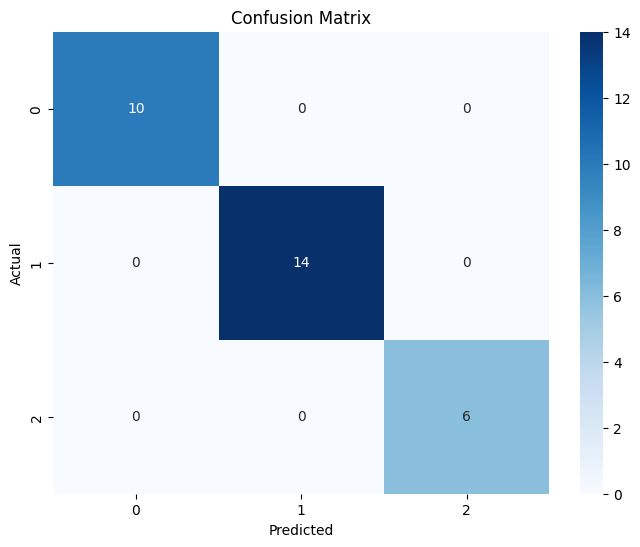

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos la matriz de confusion
conf_matrix_train = confusion_matrix(y_train, y_pred)

# Mostramos la matriz de confusión en un heat map
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Finalmente, mostramos tres registros, donde se ve la predicción esperada y la recibida por el modelo. Esto lo hacemos para confirmar que las predicciones sean correctas.

In [ ]:
# Creamos un dataframe nuevo
temp_df = pd.DataFrame(X_train, columns=columns[:-1])
temp_df['label'] = y_train
# Agregamos las predicciones del modelo
temp_df['predicted_label'] = y_pred

# Desplegamos una muestra de las predicciones hechas
print(temp_df.sample(n=3))

    sepal length  sepal width  petal length  petal width        label  \
37           4.9          3.1           1.5          0.1  Iris-setosa   
29           4.7          3.2           1.6          0.2  Iris-setosa   
48           5.3          3.7           1.5          0.2  Iris-setosa   

   predicted_label  
37     Iris-setosa  
29     Iris-setosa  
48     Iris-setosa  


## **Testing del modelo**

Ahora, vamos a probar el modelo con datos que nunca haya visto. Para esto, hacemos predicciones con el set de datos de testing. Podemos comprobar que tan buenos fueron las predicciones del modelo.

Se puede ver que tiene una precisión un poco más baja que la de training.

In [ ]:
# Con el modelo entrenado, hacemos predicciones sobre el testing
y_pred = tree.predict(X_test)

# Evaluamos que tantos resultados nos dio correctamente el modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667


Aún así, el modelo es bastante bueno ya que clasificó correctamente la mayoría de los registros. Veamos otras métricas para el modelo con las preicciones que hizo para testing.

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report_test = classification_report(y_test, y_pred)

print("Classification Report:")
print(report_test)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.94      0.97        17
Iris-versicolor       0.90      1.00      0.95        19
 Iris-virginica       1.00      0.96      0.98        24

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60



Podemos ver que el modelo sigue siendo fuerte ya que tiene buenos números para todas las métricas.

El modelo siempre clasifica correctamente la Iris Setosa, pero se confunde entre la Iris Versicolor y la Iris Virginica. A continuaación se muestra cuantas muestras clasificó erroneamente en la matriz de confusión.

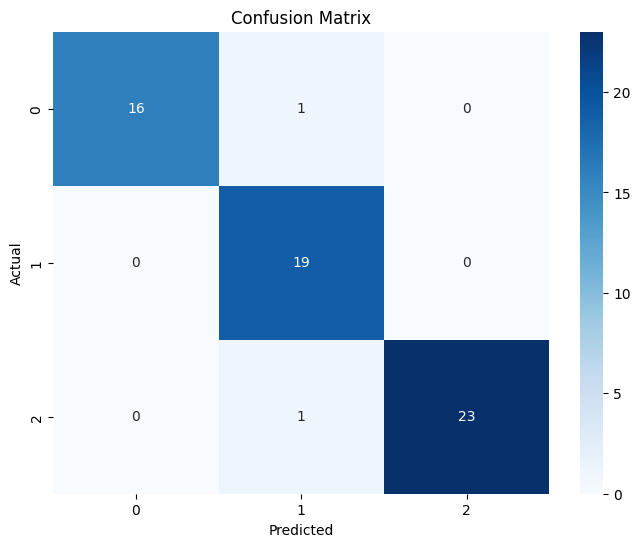

In [ ]:
# Create a confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Por último está una pequeña muestra de los datos que clasificó. Esta muestra es aleatoria, por lo que puede parecer que clasificó todo correctamente, pero arriba ya se mostró que no clasifica todo correctamente.

In [ ]:
# Creamos un dataframe nuevo
temp_df = pd.DataFrame(X_test, columns=columns[:-1])
temp_df['label'] = y_test
# Agregamos las predicciones del modelo
temp_df['predicted_label'] = y_pred

# Desplegamos una muestra de las predicciones hechas
print(temp_df.sample(n=3))

     sepal length  sepal width  petal length  petal width            label  \
14            5.8          4.0           1.2          0.2      Iris-setosa   
64            5.6          2.9           3.6          1.3  Iris-versicolor   
126           6.2          2.8           4.8          1.8   Iris-virginica   

     predicted_label  
14       Iris-setosa  
64   Iris-versicolor  
126   Iris-virginica  


## **Otros datos del modelo**

Finalmente, podemos ver el modelo gráficamente para ver las decisiones que toma y que tan profundo es.

[Text(0.3333333333333333, 0.9, 'x[3] <= 0.454\nentropy = 1.506\nsamples = 30\nvalue = [10, 14, 6]'),
 Text(0.16666666666666666, 0.7, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.723\nentropy = 0.881\nsamples = 20\nvalue = [0, 14, 6]'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0]'),
 Text(0.6666666666666666, 0.5, 'x[3] <= 2.185\nentropy = 0.592\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(0.5, 0.3, 'x[3] <= 1.796\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8333333333333334, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]')]

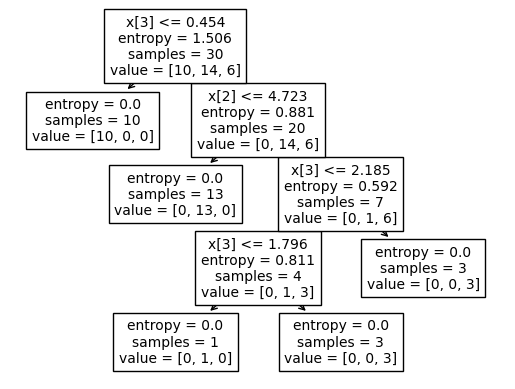

In [ ]:
#Graficamos el arbol para ver las decisiones que toma

from sklearn.tree import plot_tree
plot_tree(tree)

# **Análisis y reporte del modelo**

En esta sección se hará un análisis del modelo, para ver su grado de bias, de varianza y el su ajuste a los datos.

## **Grado de bias**

In [ ]:
print("Train Classification Report:")
print(report_train)

print("Test Classification Report:")
print(report_test)

Train Classification Report:
{'Iris-setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10}, 'Iris-versicolor': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 14}, 'Iris-virginica': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30}}
Test Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.94      0.97        17
Iris-versicolor       0.90      1.00      0.95        19
 Iris-virginica       1.00      0.96      0.98        24

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60



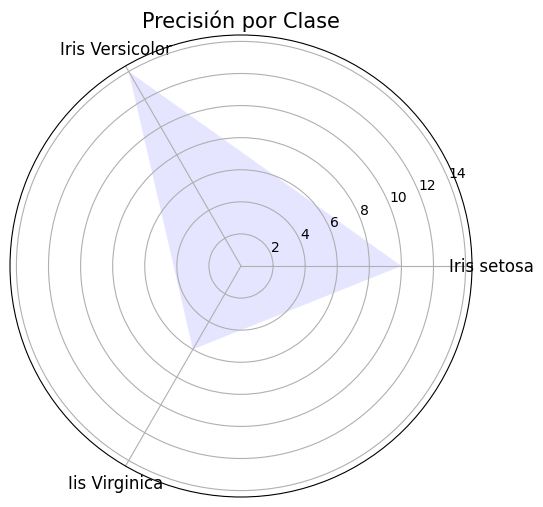

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Precisión para cada clase (reemplaza con tus valores reales)
classes = ['Iris setosa', 'Iris Versicolor', 'Iis Virginica']
precision = [report_train['Iris-setosa']['support'],
             report_train['Iris-versicolor']['support'],
             report_train['Iris-virginica']['support']]  # Precisión para cada clase

# Número de clases
num_classes = len(classes)

# Ángulos para el gráfico de radar
angles = np.linspace(0, 2 * np.pi, num_classes, endpoint=False).tolist()

# Agregar el primer ángulo al final para cerrar el gráfico
angles += angles[:1]

# Precisión para el primer elemento al final para cerrar el gráfico
precision += precision[:1]

# Crear una figura y un eje polar
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Configurar etiquetas en los ángulos
plt.xticks(angles[:-1], classes, fontsize=12)

# Llenar el gráfico con los valores de precisión
ax.fill(angles, precision, 'b', alpha=0.1)

# Configurar el título
plt.title('Precisión por Clase', size=15)

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (reemplaza esto con tus datos reales)
y_true = y_test
y_pred_prob = y_pred

# Define umbrales de decisión (ajusta según tus necesidades)
thresholds = [0.2, 0.4, 0.6, 0.8]

# Crear una figura
plt.figure(figsize=(8, 8))

# Loop a través de los umbrales de decisión y traza los puntos
for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    plt.scatter(y_pred_prob[y_true == 1], y_pred_prob[y_true == 0], label=f'Threshold={threshold}')

# Configurar etiquetas y leyenda
plt.xlabel('Predicciones Positivas')
plt.ylabel('Predicciones Negativas')
plt.legend()

# Configurar líneas que representan los ejes de precisión y recall perfectos
plt.plot([0, 1], [1, 0], 'k--', label='Precision-Recall Perfecto')

# Añadir una cuadrícula
plt.grid(True)

# Título y mostrar el gráfico
plt.title('Gráfico de Precisión vs. Recall')
plt.show()


TypeError: ignored

<Figure size 800x800 with 0 Axes>

## **Grado de varianza**

## **Grado de ajuste del modelo**

# **Regularización del modelo**